# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error, mean_absolute_percentage_error


import warnings
warnings.filterwarnings('ignore')

# Importing the Datasets

In [2]:
df = pd.read_csv('dataset.csv')
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [3]:
df.columns.unique()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

# Description of Features

* Datetime - hourly date + timestamp

* Season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

* Holiday - whether the day is considered a holiday

* Workingday - whether the day is neither a weekend nor holiday

* Weather -

    * Clear, Few clouds, Partly cloudy, Partly cloudy
    * Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    * Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    * Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

* Temp - temperature in Celsius

* aTemp - "feels like" temperature in Celsius

* Humidity - relative humidity

* Windspeed - wind speed

* Casual - number of non-registered user rentals initiated

* Registered - number of registered user rentals initiated

* Count - number of total rentals

    Here, all the features are numeric and the target variable that we have to predict is the COUNT variable.Hence, this is an example of a regression problem as the COUNT variable is continous.

In [4]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

# Exploratory Data Analysis

## Discrete Varaibles

### 1. Season

In [5]:
df.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

<AxesSubplot:xlabel='season', ylabel='count'>

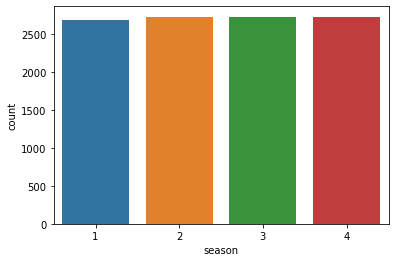

In [6]:
sns.countplot(df['season'])

### 2. Holiday

In [7]:
df.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

<AxesSubplot:xlabel='holiday', ylabel='count'>

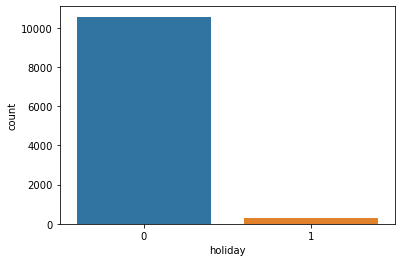

In [8]:
sns.countplot(df['holiday'])

### 3. Working Day

In [9]:
df.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

<AxesSubplot:xlabel='workingday', ylabel='count'>

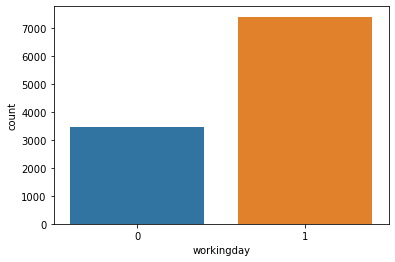

In [10]:
sns.countplot(df['workingday'])

### 4. Weather

In [11]:
df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

<AxesSubplot:xlabel='weather', ylabel='count'>

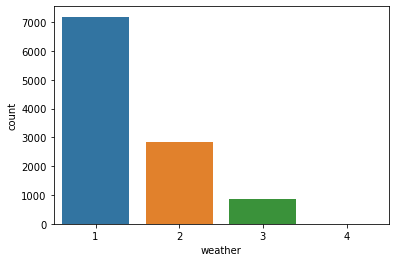

In [12]:
sns.countplot(df['weather'])

## Continous Variable

In [13]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


<AxesSubplot:>

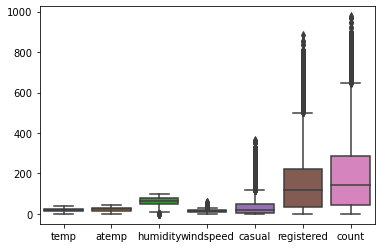

In [14]:
# Boxplot
continous_varaibles = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
sns.boxplot(data = df[continous_varaibles])

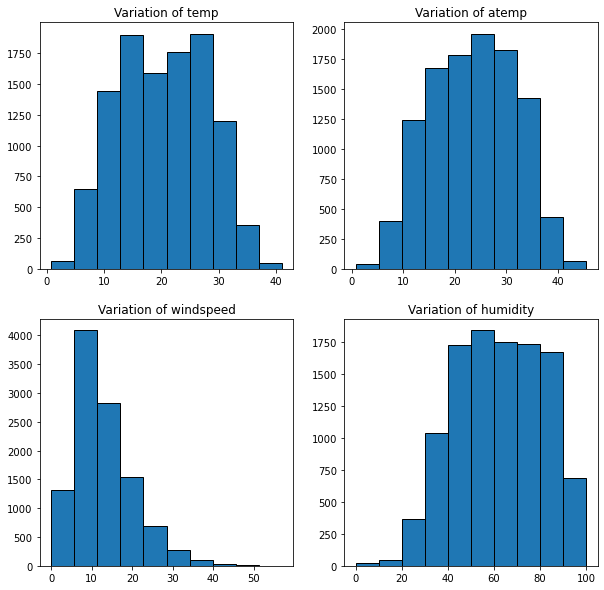

In [15]:
# Histogram
df.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=df,edgecolor="black")
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="atemp",data=df,edgecolor="black")
axes[0,1].set_title("Variation of atemp")
axes[1,0].hist(x="windspeed",data=df,edgecolor="black")
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=df,edgecolor="black")
axes[1,1].set_title("Variation of humidity")
fig.set_size_inches(10,10)

## Correlation Matrix

In [16]:
corr = df.corr()
corr.style.background_gradient()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


# Preprocessing

### Encoding

In [17]:
# Encoding season in the dataset
season=pd.get_dummies(df['season'],prefix='season',drop_first = True)
df=pd.concat([df,season],axis=1)
df.drop(['season'],inplace=True,axis=1)

In [18]:
# Encoding weather and dropping weather
weather=pd.get_dummies(df['weather'],prefix='weather',drop_first = True)
df=pd.concat([df,weather],axis=1)
df.drop(['weather'],inplace=True,axis=1)
df.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,weather_2,weather_3,weather_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,0,0,0,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,0,0,0,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,0,0,0,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,0,0,0,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,0,0,0,0,0,0


In [19]:
corr2 = df.corr()
corr2.style.background_gradient()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,weather_2,weather_3,weather_4
holiday,1.000000,-0.250491,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.038250,0.022790,0.022751,0.013868,-0.019514,-0.001644
workingday,-0.250491,1.000000,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,0.014620,-0.007194,-0.007048,0.003324,0.036643,0.006562
temp,0.000295,0.029966,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.192661,0.635975,-0.266220,-0.046925,-0.025715,-0.014800
atemp,-0.005215,0.024660,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.204421,0.607090,-0.245690,-0.040792,-0.031154,-0.013901
humidity,0.001929,-0.010880,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.031095,0.067308,0.129018,0.222398,0.295894,0.012010
windspeed,0.008409,0.013373,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.042991,-0.091521,-0.079535,-0.045016,0.045597,-0.007979
casual,0.043799,-0.319111,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.132405,0.187726,-0.086258,-0.062184,-0.108853,-0.005760
registered,-0.020956,0.119460,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.046969,0.102142,0.056961,-0.028997,-0.104936,0.000155
count,-0.005393,0.011594,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000,0.075681,0.136942,0.023704,-0.041329,-0.117519,-0.001459
season_2,-0.038250,0.014620,0.192661,0.204421,-0.031095,0.042991,0.132405,0.046969,0.075681,1.000000,-0.335214,-0.335296,-0.001687,0.006556,-0.005549


In [20]:
# Now spereating date time as time of the day will effect the bike count as early morning more 
#people will opt for bikes.

In [21]:
df["hour"] = [t.hour for t in pd.DatetimeIndex(df.datetime)]
df["day"] = [t.dayofweek for t in pd.DatetimeIndex(df.datetime)]
df["month"] = [t.month for t in pd.DatetimeIndex(df.datetime)]
df['year'] = [t.year for t in pd.DatetimeIndex(df.datetime)]
df['year'] = df['year'].map({2011:0, 2012:1})
df.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,0,0,0,0,0,0,0,5,1,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,0,0,0,0,0,0,1,5,1,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,0,0,0,0,0,0,2,5,1,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,0,0,0,0,0,0,3,5,1,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,0,0,0,0,0,0,4,5,1,0


In [22]:
corr3 = df.corr()
corr3.style.background_gradient()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_2,season_3,season_4,weather_2,weather_3,weather_4,hour,day,month,year
holiday,1.000000,-0.250491,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,-0.038250,0.022790,0.022751,0.013868,-0.019514,-0.001644,-0.000354,-0.191832,0.001731,0.012021
workingday,-0.250491,1.000000,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,0.014620,-0.007194,-0.007048,0.003324,0.036643,0.006562,0.002780,-0.704267,-0.003394,-0.002482
temp,0.000295,0.029966,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.192661,0.635975,-0.266220,-0.046925,-0.025715,-0.014800,0.145430,-0.038466,0.257589,0.061226
atemp,-0.005215,0.024660,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.204421,0.607090,-0.245690,-0.040792,-0.031154,-0.013901,0.140343,-0.040235,0.264173,0.058540
humidity,0.001929,-0.010880,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.031095,0.067308,0.129018,0.222398,0.295894,0.012010,-0.278011,-0.026507,0.204537,-0.078606
windspeed,0.008409,0.013373,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,0.042991,-0.091521,-0.079535,-0.045016,0.045597,-0.007979,0.146631,-0.024804,-0.150192,-0.015221
casual,0.043799,-0.319111,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.132405,0.187726,-0.086258,-0.062184,-0.108853,-0.005760,0.302045,0.246959,0.092722,0.145241
registered,-0.020956,0.119460,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.046969,0.102142,0.056961,-0.028997,-0.104936,0.000155,0.380540,-0.084427,0.169451,0.264265
count,-0.005393,0.011594,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000,0.075681,0.136942,0.023704,-0.041329,-0.117519,-0.001459,0.400601,-0.002283,0.166862,0.260403
season_2,-0.038250,0.014620,0.192661,0.204421,-0.031095,0.042991,0.132405,0.046969,0.075681,1.000000,-0.335214,-0.335296,-0.001687,0.006556,-0.005549,-0.002733,-0.000757,-0.255581,-0.002446


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('count',axis=1),df['count'], test_size=0.2)

In [24]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size=0.2)

## Hyperparameter Tuning

    Choosing RMSE (Root Mean Square Error) as error metric.

In [25]:
depth = np.arange(1, 15)
mae = []
mse = []
rmse = []
mape = []
for k in depth:
    reg_tree = DecisionTreeRegressor(max_depth=k, min_samples_leaf=5)
    reg_tree.fit(X_train, y_train)
    y_pred = reg_tree.predict(X_valid)
    rmse.append(np.sqrt(mean_squared_error(y_valid,y_pred)))

ValueError: could not convert string to float: '2012-08-13 07:00:00'

In [ ]:
plt.plot(depth, np.array(rmse))
plt.show()

In [ ]:
n_neighbours = np.arange(1, 15)
mae = []
mse = []
rmse = []
mape = []
for k in depth:
    reg = KNeighborsRegressor(n_neighbors = k)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_valid)
    rmse.append(np.sqrt(mean_squared_error(y_valid, y_pred)))

In [ ]:
plt.plot(n_neighbours, np.array(rmse))
plt.show()

In [ ]:
# Regression Tree at Minimum RMSE
reg_tree = DecisionTreeRegressor(max_depth=9, min_samples_leaf=5)
reg_tree.fit(X_train, y_train)
y_pred = reg_tree.predict(X_test)

In [ ]:
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE (Root Mean Squared Error for DecisionTree Regressor):- {rmse_dt})")

In [ ]:
# KNeighbours Regressor at Minimum RMSE
reg = KNeighborsRegressor(n_neighbors = 7)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [ ]:
rmse_k = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE (Root Mean Squared Error KNeighbours Regressor):- {rmse_k})")

    After comparing both the RMSE of both models we can see that KNeighbors Regressor has performed a little bit better.